In [1]:
from scipy.optimize import least_squares
import numpy as np
import matplotlib.pyplot as plt
import ares
from average_dTb import average_dTb
import os

In [2]:
# !python remote.py

In [3]:
sim = ares.simulations.Global21cm(radiative_transfer=False)
sim.run()

# Loaded $ARES/input/inits/inits_planck_TTTEEE_lowl_lowE_best.txt.

############################################################################
##                       ARES Simulation: Overview                        ##
############################################################################
## ---------------------------------------------------------------------- ##
## Source Populations                                                     ##
## ---------------------------------------------------------------------- ##
##           sfrd    sed  radio  O/IR  Lya    LW   LyC   Xray  RTE        ##
## pop #0 :  fcoll    yes    -     -     x     -     -     -     -        ##
## pop #1 : sfrd->0   yes    -     -     -     -     -     x     -        ##
## pop #2 : sfrd->0   yes    -     -     -     -     x     -     -        ##
## ---------------------------------------------------------------------- ##
## Physics                                                                ##
## -----

In [4]:
def dTb(theta, z):
    m_chi = theta[0]
    
    directory = "average_dTb/m_chi"+"{:.2f}".format(m_chi)
    if os.path.exists(directory):
        if np.size(os.listdir(directory)) < 150:
            more_random_v_stream = 150 - np.size(os.listdir(directory))
            print("{} more_random_v_streams will be generated for m_chi = {} GeV.".format(more_random_v_stream, m_chi))
        else:
            more_random_v_stream = 0
            print("Adequate files already exist for m_chi = {} GeV. No more random v_streams to be generated.".format(m_chi))
    else:
        more_random_v_stream = 150
        print("{} more random v_streams will be generated for m_chi = {} GeV.".format(more_random_v_stream, m_chi))
    
    z_array, dTb_averaged, m_chi = average_dTb(m_chi=m_chi, more_random_v_stream=more_random_v_stream, mpi=1)
    
    dTb = np.interp(z, z_array, dTb_averaged)
    return dTb

In [14]:
z_sample = np.arange(10, 300, 5)

theta_true = [0.35]
dTb_accurate = dTb(theta_true, z_sample)

noise = 5
dTb_sample = dTb_accurate + noise * np.random.normal(size = z_sample.shape[0])

Adequate files already exist for m_chi = 0.35 GeV. No more random v_streams to be generated.
Preprocessing 150 files of dTb for m_chi = 0.35 GeV...
150 files have been interpolated.
---------------------------------------------


(-60.0, 0.0)

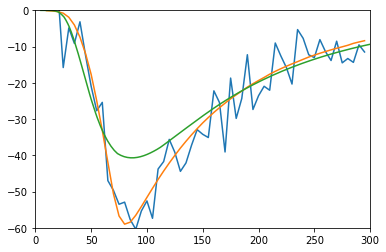

In [16]:
plt.plot(z_sample, dTb_sample)
plt.plot(z_sample, dTb_accurate)
plt.plot(sim.history['z'], sim.history['dTb'])
plt.xlim(0,300)
plt.ylim(-60,0)

In [17]:
def fun(theta):
    residual = abs(dTb(theta, z_sample) - dTb_sample)
    return residual

In [18]:
theta_guess = [0.1]
res = least_squares(fun, theta_guess, diff_step=0.1, bounds=(0, 10), xtol=1e-3)

Adequate files already exist for m_chi = 0.1 GeV. No more random v_streams to be generated.
Preprocessing 182 files of dTb for m_chi = 0.1 GeV...
182 files have been interpolated.
---------------------------------------------
Adequate files already exist for m_chi = 0.2 GeV. No more random v_streams to be generated.
Preprocessing 150 files of dTb for m_chi = 0.2 GeV...
150 files have been interpolated.
---------------------------------------------
Adequate files already exist for m_chi = 0.2 GeV. No more random v_streams to be generated.
Preprocessing 150 files of dTb for m_chi = 0.2 GeV...
150 files have been interpolated.
---------------------------------------------
Adequate files already exist for m_chi = 0.30000000000000004 GeV. No more random v_streams to be generated.
Preprocessing 150 files of dTb for m_chi = 0.30000000000000004 GeV...
150 files have been interpolated.
---------------------------------------------
Adequate files already exist for m_chi = 0.3533040117921339 GeV.

/usr/local/pace-apps/manual/packages/anaconda3/2022.05/lib/python3.9/site-packages/scipy/integrate/_ode.py:1350: UserWarning: lsoda: Excess work done on this call (perhaps wrong Dfun type).
  warnings.warn('{:s}: {:s}'.format(self.__class__.__name__,
/usr/local/pace-apps/manual/packages/anaconda3/2022.05/lib/python3.9/site-packages/scipy/integrate/_ode.py:1350: UserWarning: lsoda: Excess work done on this call (perhaps wrong Dfun type).
  warnings.warn('{:s}: {:s}'.format(self.__class__.__name__,
/usr/local/pace-apps/manual/packages/anaconda3/2022.05/lib/python3.9/site-packages/scipy/integrate/_ode.py:1350: UserWarning: lsoda: Excess work done on this call (perhaps wrong Dfun type).
  warnings.warn('{:s}: {:s}'.format(self.__class__.__name__,



pid = 76673, initial_v_stream = 14839.245086592982 m/s
pid = 76688, initial_v_stream = 24897.418497204595 m/s
pid = 76664, initial_v_stream = 41081.69049204925 m/s
pid = 76667, initial_v_stream = 30034.765231124606 m/s
pid = 76684, initial_v_stream = 25438.71766578866 m/s
pid = 76677, initial_v_stream = 28417.058970610728 m/s
pid = 76666, initial_v_stream = 20504.862883205606 m/s
pid = 76689, initial_v_stream = 20046.537968571145 m/s
pid = 76687, initial_v_stream = 30860.166143029724 m/s
pid = 76670, initial_v_stream = 29339.29511268937 m/s
pid = 76682, initial_v_stream = 28087.13424326276 m/s
pid = 76690, initial_v_stream = 23835.096457198266 m/s
pid = 76675, initial_v_stream = 26903.59318934658 m/s
pid = 76681, initial_v_stream = 15343.229948353577 m/s
pid = 76683, initial_v_stream = 21491.616244460525 m/s
pid = 76665, initial_v_stream = 9194.054821366683 m/s
pid = 76663, initial_v_stream = 38310.38840565166 m/s

/usr/local/pace-apps/manual/packages/anaconda3/2022.05/lib/python3.9/site-packages/scipy/integrate/_ode.py:1350: UserWarning: lsoda: Excess work done on this call (perhaps wrong Dfun type).
  warnings.warn('{:s}: {:s}'.format(self.__class__.__name__,



pid = 76680, initial_v_stream = 27847.77344810294 m/s
pid = 76674, initial_v_stream = 34664.06161443029 m/s
pid = 76685, initial_v_stream = 23612.04414322076 m/s
pid = 76668, initial_v_stream = 34443.177608460435 m/s
pid = 76662, initial_v_stream = 39962.85621070986 m/s
pid = 76669, initial_v_stream = 15166.627708084156 m/s
pid = 76691, initial_v_stream = 15647.701820946582 m/s
pid = 76671, initial_v_stream = 17946.00287498479 m/s
pid = 76678, initial_v_stream = 27826.46542268267 m/s
pid = 76676, initial_v_stream = 6320.440370044547 m/s
pid = 76672, initial_v_stream = 26659.829934651883 m/s
pid = 76692, initial_v_stream = 39646.569674977465 m/s
pid = 76693, initial_v_stream = 41822.83926964972 m/s
pid = 76686, initial_v_stream = 13740.24362495692 m/s
pid = 76679, initial_v_stream = 24613.866813359975 m/s

/usr/local/pace-apps/manual/packages/anaconda3/2022.05/lib/python3.9/site-packages/scipy/integrate/_ode.py:1350: UserWarning: lsoda: Excess work done on this call (perhaps wrong Dfun type).
  warnings.warn('{:s}: {:s}'.format(self.__class__.__name__,
/usr/local/pace-apps/manual/packages/anaconda3/2022.05/lib/python3.9/site-packages/scipy/integrate/_ode.py:1350: UserWarning: lsoda: Excess work done on this call (perhaps wrong Dfun type).
  warnings.warn('{:s}: {:s}'.format(self.__class__.__name__,



pid = 76667, initial_v_stream = 36967.98210658454 m/s
pid = 76688, initial_v_stream = 41717.19283954313 m/s
pid = 76666, initial_v_stream = 20918.71284969884 m/s
pid = 76664, initial_v_stream = 21962.807028542706 m/s
pid = 76689, initial_v_stream = 19918.383868781882 m/s
pid = 76677, initial_v_stream = 40139.42735968585 m/s
pid = 76684, initial_v_stream = 24082.137598328765 m/s
pid = 76687, initial_v_stream = 39343.556886529645 m/s
pid = 76670, initial_v_stream = 34154.10077352051 m/s
pid = 76682, initial_v_stream = 23982.429175316476 m/s
pid = 76690, initial_v_stream = 12379.807669612668 m/s
pid = 76675, initial_v_stream = 21873.151426110315 m/s
pid = 76681, initial_v_stream = 27271.625023757337 m/s
pid = 76683, initial_v_stream = 34407.77204606871 m/s
pid = 76665, initial_v_stream = 21501.08243467783 m/s
pid = 76673, initial_v_stream = 31232.611216684305 m/s
pid = 76674, initial_v_stream = 9526.143341233832 m/s
pid = 76680, initial_v_stream = 28025.513654538194 m/s
pid = 76685, init

/usr/local/pace-apps/manual/packages/anaconda3/2022.05/lib/python3.9/site-packages/scipy/integrate/_ode.py:1350: UserWarning: lsoda: Excess work done on this call (perhaps wrong Dfun type).
  warnings.warn('{:s}: {:s}'.format(self.__class__.__name__,
/usr/local/pace-apps/manual/packages/anaconda3/2022.05/lib/python3.9/site-packages/scipy/integrate/_ode.py:1350: UserWarning: lsoda: Excess work done on this call (perhaps wrong Dfun type).
  warnings.warn('{:s}: {:s}'.format(self.__class__.__name__,
/usr/local/pace-apps/manual/packages/anaconda3/2022.05/lib/python3.9/site-packages/scipy/integrate/_ode.py:1350: UserWarning: lsoda: Excess work done on this call (perhaps wrong Dfun type).
  warnings.warn('{:s}: {:s}'.format(self.__class__.__name__,



pid = 76667, initial_v_stream = 25855.774792050437 m/s
pid = 76664, initial_v_stream = 37475.66915091325 m/s
pid = 76689, initial_v_stream = 10945.660119276516 m/s
pid = 76688, initial_v_stream = 35109.652241833945 m/s
pid = 76684, initial_v_stream = 50005.79746833987 m/s

/usr/local/pace-apps/manual/packages/anaconda3/2022.05/lib/python3.9/site-packages/scipy/integrate/_ode.py:1350: UserWarning: lsoda: Excess work done on this call (perhaps wrong Dfun type).
  warnings.warn('{:s}: {:s}'.format(self.__class__.__name__,



pid = 76670, initial_v_stream = 13755.366163168299 m/s
pid = 76677, initial_v_stream = 13091.017371152398 m/s
pid = 76681, initial_v_stream = 18036.637356787134 m/s
pid = 76683, initial_v_stream = 55683.20533239469 m/s
pid = 76687, initial_v_stream = 21258.940367807463 m/s
pid = 76678, initial_v_stream = 15781.203304822666 m/s
pid = 76682, initial_v_stream = 14396.279732424642 m/s
pid = 76666, initial_v_stream = 21380.607458137434 m/s
pid = 76675, initial_v_stream = 40743.829396287016 m/s
pid = 76676, initial_v_stream = 28688.17814725293 m/s
pid = 76692, initial_v_stream = 53766.39396785804 m/s
pid = 76669, initial_v_stream = 68019.6200453991 m/s
pid = 76690, initial_v_stream = 31055.434236300334 m/s
pid = 76665, initial_v_stream = 20067.509032012174 m/s

/usr/local/pace-apps/manual/packages/anaconda3/2022.05/lib/python3.9/site-packages/scipy/integrate/_ode.py:1350: UserWarning: lsoda: Excess work done on this call (perhaps wrong Dfun type).
  warnings.warn('{:s}: {:s}'.format(self.__class__.__name__,



pid = 76668, initial_v_stream = 32296.64882125437 m/s
pid = 76685, initial_v_stream = 15616.78417361224 m/s
pid = 76673, initial_v_stream = 37830.81830610814 m/s
pid = 76662, initial_v_stream = 21723.67619389935 m/s
pid = 76693, initial_v_stream = 20559.173208722113 m/s
pid = 76671, initial_v_stream = 33340.25531434018 m/s
pid = 76674, initial_v_stream = 31974.577066951537 m/s
pid = 76672, initial_v_stream = 21211.879622758835 m/s
pid = 76680, initial_v_stream = 12472.365679657685 m/s
pid = 76686, initial_v_stream = 29098.72016046269 m/s
pid = 76691, initial_v_stream = 31902.053588851228 m/s
pid = 76663, initial_v_stream = 29624.013161588166 m/s
pid = 76679, initial_v_stream = 31073.9721575819 m/s

/usr/local/pace-apps/manual/packages/anaconda3/2022.05/lib/python3.9/site-packages/scipy/integrate/_ode.py:1350: UserWarning: lsoda: Excess work done on this call (perhaps wrong Dfun type).
  warnings.warn('{:s}: {:s}'.format(self.__class__.__name__,



pid = 76667, initial_v_stream = 27610.08777317547 m/s
pid = 76689, initial_v_stream = 25380.945929740516 m/s
pid = 76688, initial_v_stream = 27762.374873263077 m/s
pid = 76677, initial_v_stream = 22213.95797140004 m/s
pid = 76670, initial_v_stream = 41952.83929590424 m/s
pid = 76684, initial_v_stream = 40379.36413044991 m/s
pid = 76681, initial_v_stream = 39885.468370005634 m/s
pid = 76687, initial_v_stream = 28818.106019952906 m/s
pid = 76666, initial_v_stream = 8788.460907610566 m/s
pid = 76678, initial_v_stream = 15295.878312588995 m/s
pid = 76682, initial_v_stream = 21618.396663952306 m/s

/usr/local/pace-apps/manual/packages/anaconda3/2022.05/lib/python3.9/site-packages/scipy/integrate/_ode.py:1350: UserWarning: lsoda: Excess work done on this call (perhaps wrong Dfun type).
  warnings.warn('{:s}: {:s}'.format(self.__class__.__name__,
/usr/local/pace-apps/manual/packages/anaconda3/2022.05/lib/python3.9/site-packages/scipy/integrate/_ode.py:1350: UserWarning: lsoda: Excess work done on this call (perhaps wrong Dfun type).
  warnings.warn('{:s}: {:s}'.format(self.__class__.__name__,



pid = 76667, initial_v_stream = 22173.33363765678 m/s
pid = 76688, initial_v_stream = 23721.541999960886 m/s
pid = 76670, initial_v_stream = 58163.24877853353 m/s
pid = 76687, initial_v_stream = 46410.88580466961 m/s
pid = 76681, initial_v_stream = 19987.214679987563 m/s
pid = 76684, initial_v_stream = 24448.856175857858 m/s
pid = 76689, initial_v_stream = 27631.554720272856 m/s
pid = 76678, initial_v_stream = 25674.347301711266 m/s
pid = 76666, initial_v_stream = 33245.8143011206 m/s
pid = 76682, initial_v_stream = 12713.61537438613 m/s
pid = 76677, initial_v_stream = 15845.3686524761 m/s
It costs 267.73 seconds to calculate dTb of 150 different initial_v_streams.
Preprocessing 150 files of dTb for m_chi = 0.33132146547542757 GeV...
150 files have been interpolated.
---------------------------------------------
Adequate files already exist for m_chi = 0.3478083752129573 GeV. No more random v_streams to be generated.
Preprocessing 150 files of dTb for m_chi = 0.3478083752129573 GeV...

In [19]:
print(res.success)
print(res.status)

True
3


In [20]:
res.x

array([0.35330401])

Adequate files already exist for m_chi = 0.3533040117921339 GeV. No more random v_streams to be generated.
Preprocessing 150 files of dTb for m_chi = 0.3533040117921339 GeV...
150 files have been interpolated.
---------------------------------------------


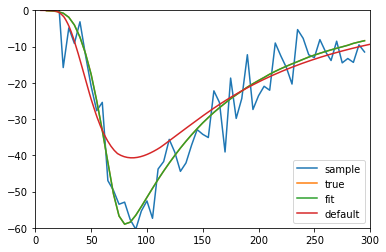

In [21]:
plt.plot(z_sample, dTb_sample, label='sample')
plt.plot(z_sample, dTb_accurate, label = 'true')
plt.plot(z_sample, dTb(res.x, z_sample), label = 'fit')
plt.plot(sim.history['z'], sim.history['dTb'], label = 'default')
plt.xlim(0,300)
plt.ylim(-60,0)
plt.legend()

In [ ]:
plt.plot(z_sample, dTb_sample, label='sample')
plt.plot(z_sample, dTb_accurate, label = 'true')
plt.plot(z_sample, dTb([0.40], z_sample), label = 'fit')
# plt.plot(sim.history['z'], sim.history['dTb'], label = 'default')
plt.xlim(0,300)
plt.ylim(-60,0)
plt.legend()

In [ ]:
# plt.plot(z_sample, dTb_sample, label='sample')
# plt.plot(z_sample, dTb_accurate, label = 'true')
plt.figure(dpi=300)
z_sample = np.arange(10, 300, 5)
# plt.plot(z_sample, dTb([0.59], z_sample), label = '59')
plt.plot(z_sample, dTb([0.55], z_sample), label = '55')
plt.plot(z_sample, dTb([0.57], z_sample), label = '57')
plt.plot(z_sample, dTb([0.59], z_sample), label = '59')
# plt.plot(sim.history['z'], sim.history['dTb'], label = 'default')
plt.xlim(0,300)
plt.ylim(-60,0)
plt.legend()

136 more_random_v_streams will be generated for m_chi = 0.55 GeV.
dark_matter_mass = 0.55 GeV
initial_v_stream = 40056.08197639586 m/s

/usr/local/pace-apps/manual/packages/anaconda3/2022.05/lib/python3.9/site-packages/scipy/integrate/_ode.py:1350: UserWarning: lsoda: Excess work done on this call (perhaps wrong Dfun type).
  warnings.warn('{:s}: {:s}'.format(self.__class__.__name__,



initial_v_stream = 2.3161696879510877e+04 m/s
initial_v_stream = 2.6399741865664782e+04 m/s
initial_v_stream = 2.2351595800868352e+04 m/s
initial_v_stream = 1.6901936996939297e+04 m/s
initial_v_stream = 1.1120796380308999e+04 m/s
initial_v_stream = 1.4528398394095593e+04 m/s
initial_v_stream = 2.6336955900978748e+04 m/s
initial_v_stream = 4.128159570500891e+04 m/s
initial_v_stream = 3.020272184909218e+04 m/s
initial_v_stream = 3.2547610023199286e+04 m/s
initial_v_stream = 1.6059844021282654e+04 m/s
initial_v_stream = 3.405520097718784e+04 m/s
initial_v_stream = 2.1148058350180636e+04 m/s
initial_v_stream = 2.3257489489427295e+04 m/s
initial_v_stream = 3.629629161068925e+04 m/s
initial_v_stream = 3.343129657976316e+04 m/s
initial_v_stream = 3.2010255483280158e+04 m/s
initial_v_stream = 7.376273080777645e+03 m/s
initial_v_stream = 2.1032427305793113e+04 m/s
initial_v_stream = 2.5995140512178794e+04 m/s
initial_v_stream = 8.968863893924836e+03 m/s
initial_v_stream = 2.16005553071537e+04 